In [31]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
from sklearn.preprocessing import LabelEncoder


/kaggle/input/-spotify-tracks-dataset/dataset.csv


## Data Preprocessing

In [32]:
df = pd.read_csv("/kaggle/input/-spotify-tracks-dataset/dataset.csv")

In [33]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [34]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [35]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [36]:
df = df.dropna(subset=['artists', 'album_name', 'track_name'])

In [37]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [38]:
df['energy_dance_ratio'] = df['energy'] / (df['danceability'] + 1e-6)
df['acoustic_electronic'] = df['acousticness'] / (df['instrumentalness'] + 1e-6)

In [39]:
df[['energy_dance_ratio', 'acoustic_electronic']].head()

,energy_dance_ratio,acoustic_electronic
0,0.681952,16019.900498
1,0.395237,140853.658537
2,0.819633,210000.000000
3,0.224059,12622.036262
4,0.716827,469000.000000


In [40]:
df['log_duration_ms'] = np.log(df['duration_ms'] + 1)

In [41]:
df['log_duration_ms'].head()

0    12.348730
1    11.915794
2    12.258793
3    12.215696
4    12.200326
Name: log_duration_ms, dtype: float64

In [42]:
artist_freq = df['artists'].value_counts() / len(df)
df['artists_freq'] = df['artists'].map(artist_freq)

In [43]:
le = LabelEncoder()
df['track_genre_encoded'] = le.fit_transform(df['track_genre'])

In [44]:
df[['artists', 'artists_freq', 'track_genre', 'track_genre_encoded']].head()

,artists,artists_freq,track_genre,track_genre_encoded
0,Gen Hoshino,0.000088,acoustic,0
1,Ben Woodward,0.000114,acoustic,0
2,Ingrid Michaelson;ZAYN,0.000009,acoustic,0
3,Kina Grannis,0.000132,acoustic,0
4,Chord Overstreet,0.000096,acoustic,0


In [45]:
bins = [0, 20, 40, 60, 80, 100]
labels = [0, 1, 2, 3, 4]  
df['popularity_bin'] = pd.cut(df['popularity'], bins=bins, labels=labels, include_lowest=True)

print("Distribution before balancing:")
print(df['popularity_bin'].value_counts())

Distribution before balancing:
popularity_bin
0    34176
1    33149
2    33104
3    12616
4      954
Name: count, dtype: int64


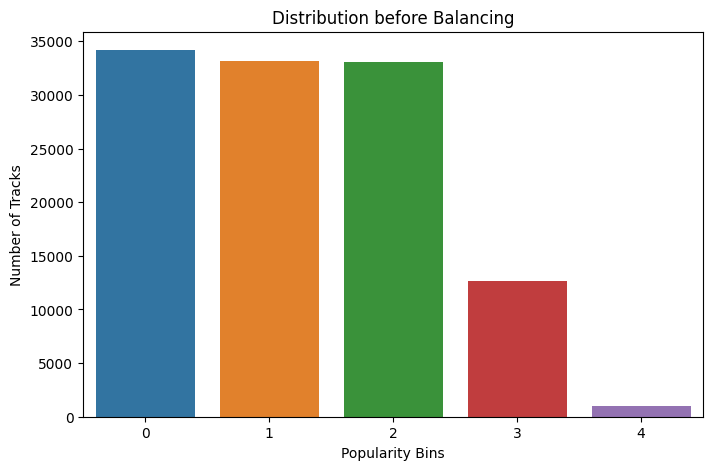

In [46]:
plt.figure(figsize=(8,5))
sns.countplot(x='popularity_bin', data=df)
plt.title('Distribution before Balancing')
plt.xlabel('Popularity Bins')
plt.ylabel('Number of Tracks')
plt.show()

In [47]:
min_count = df['popularity_bin'].value_counts().min()

balanced_df = df.groupby('popularity_bin').sample(n=min_count, random_state=42)

In [48]:
print(balanced_df['popularity_bin'].value_counts())

popularity_bin
0    954
1    954
2    954
3    954
4    954
Name: count, dtype: int64


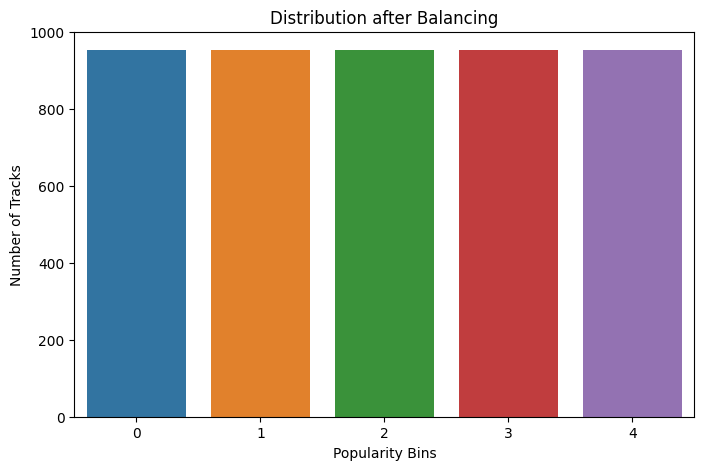

In [49]:
plt.figure(figsize=(8,5))
sns.countplot(x='popularity_bin', data=balanced_df)
plt.title('Distribution after Balancing')
plt.xlabel('Popularity Bins')
plt.ylabel('Number of Tracks')
plt.show()

## Exploratory Data Analysis

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113999 entries, 0 to 113999
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   Unnamed: 0           113999 non-null  int64   
 1   track_id             113999 non-null  object  
 2   artists              113999 non-null  object  
 3   album_name           113999 non-null  object  
 4   track_name           113999 non-null  object  
 5   popularity           113999 non-null  int64   
 6   duration_ms          113999 non-null  int64   
 7   explicit             113999 non-null  bool    
 8   danceability         113999 non-null  float64 
 9   energy               113999 non-null  float64 
 10  key                  113999 non-null  int64   
 11  loudness             113999 non-null  float64 
 12  mode                 113999 non-null  int64   
 13  speechiness          113999 non-null  float64 
 14  acousticness         113999 non-null  float64 
 15  instr

In [51]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,energy_dance_ratio,acoustic_electronic,log_duration_ms,artists_freq,track_genre_encoded
count,113999.000000,113999.000000,1.139990e+05,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000,113999.000000
mean,56999.421925,33.238827,2.280312e+05,0.566801,0.641383,5.309126,-8.258950,0.637558,0.084652,0.314907,0.156051,0.213554,0.474066,122.147695,3.904034,170.541955,119726.123833,12.264048,0.000219,56.499925
std,32909.243463,22.304959,1.072961e+05,0.173543,0.251530,3.559999,5.029357,0.480708,0.105733,0.332522,0.309556,0.190378,0.259261,29.978290,0.432623,10317.753861,228125.480074,0.381401,0.000365,32.907978
min,0.000000,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.058005,0.000009,0.000000
25%,28499.500000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218500,4.000000,0.784953,1.105789,12.067196,0.000018,28.000000
50%,56999.000000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000,1.110326,1554.794521,12.268611,0.000079,56.000000
75%,85499.500000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.597500,0.049000,0.273000,0.683000,140.071000,4.000000,1.528362,110000.000000,12.474216,0.000237,85.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000,999000.000000,994000.000000,15.471316,0.002447,113.000000


In [52]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'energy_dance_ratio', 'acoustic_electronic',
       'log_duration_ms', 'artists_freq', 'track_genre_encoded',
       'popularity_bin'],
      dtype='object')

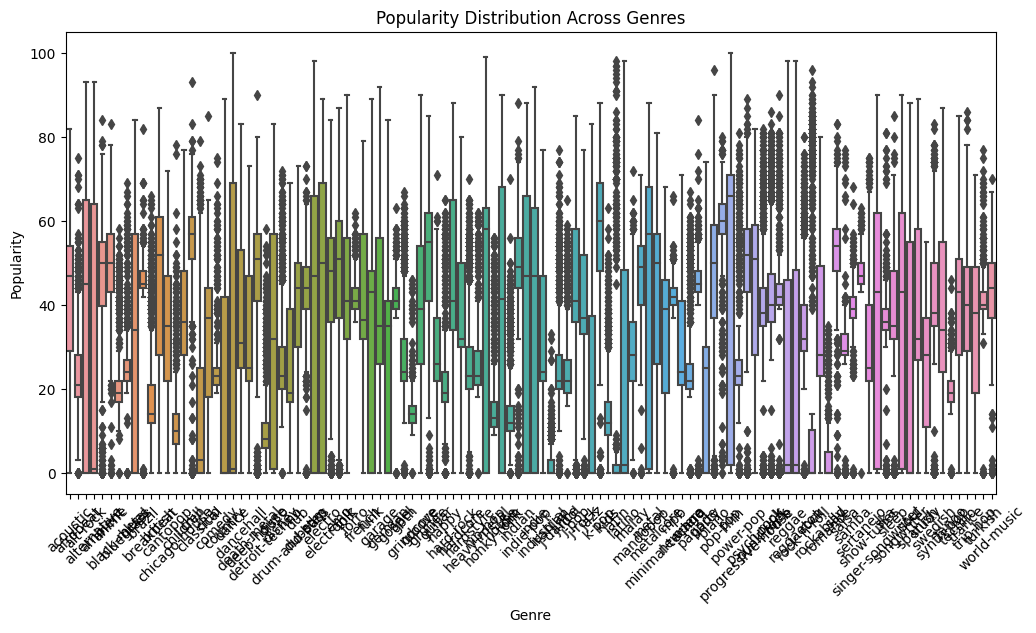

In [53]:
plt.figure(figsize=(12,6))
sns.boxplot(x='track_genre', y='popularity', data=df)
plt.xticks(rotation=45)
plt.title('Popularity Distribution Across Genres')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

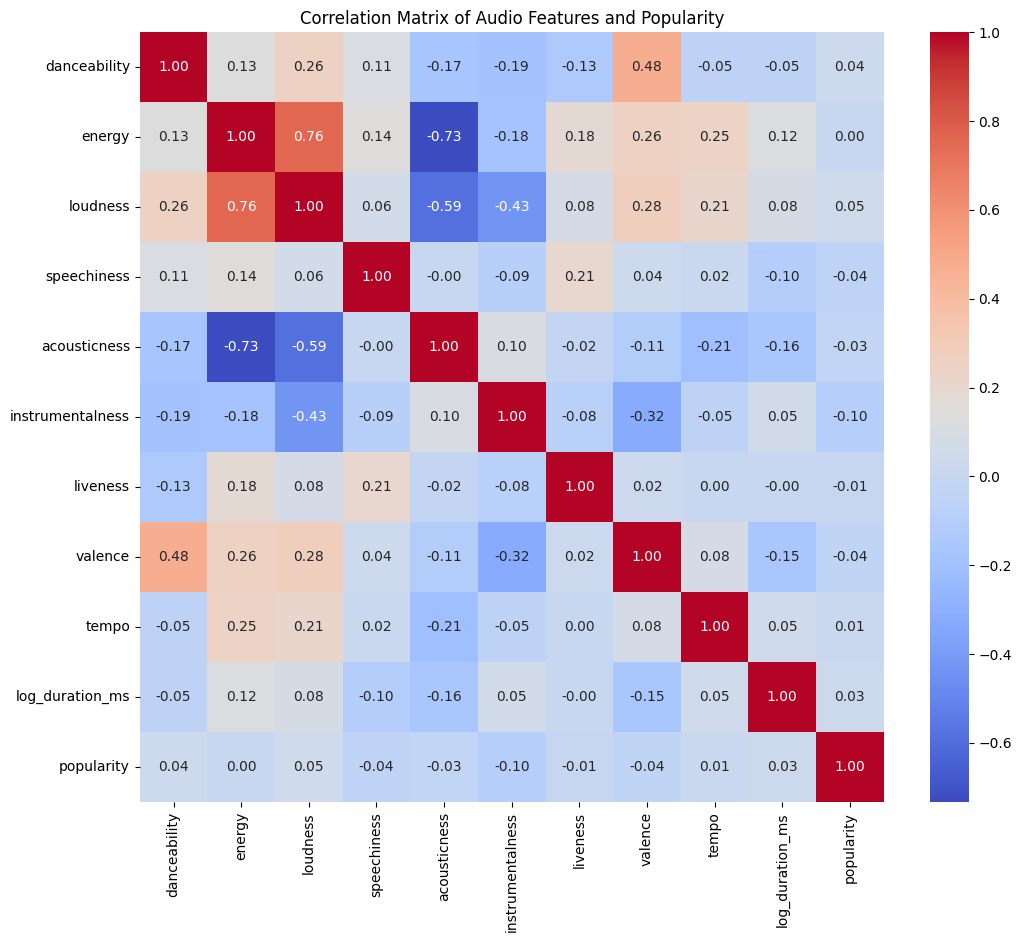

In [54]:
plt.figure(figsize=(12,10))
audio_features = ['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'log_duration_ms']

sns.heatmap(df[audio_features + ['popularity']].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Audio Features and Popularity')
plt.show()


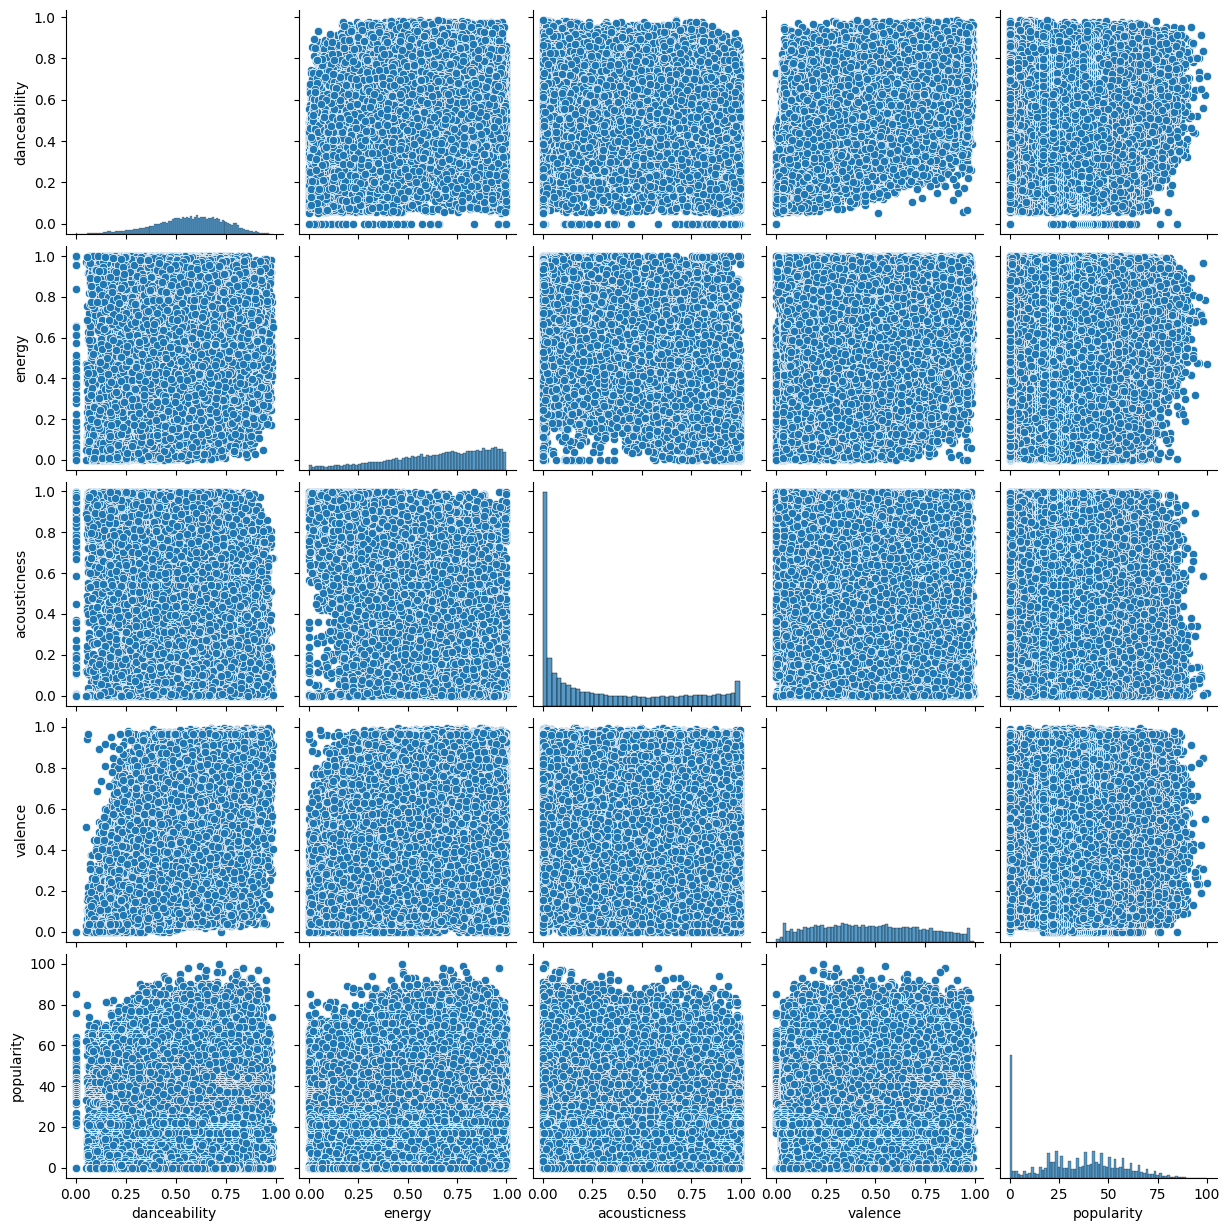

In [55]:
sns.pairplot(df[['danceability', 'energy', 'acousticness', 'valence', 'popularity']])
plt.show()

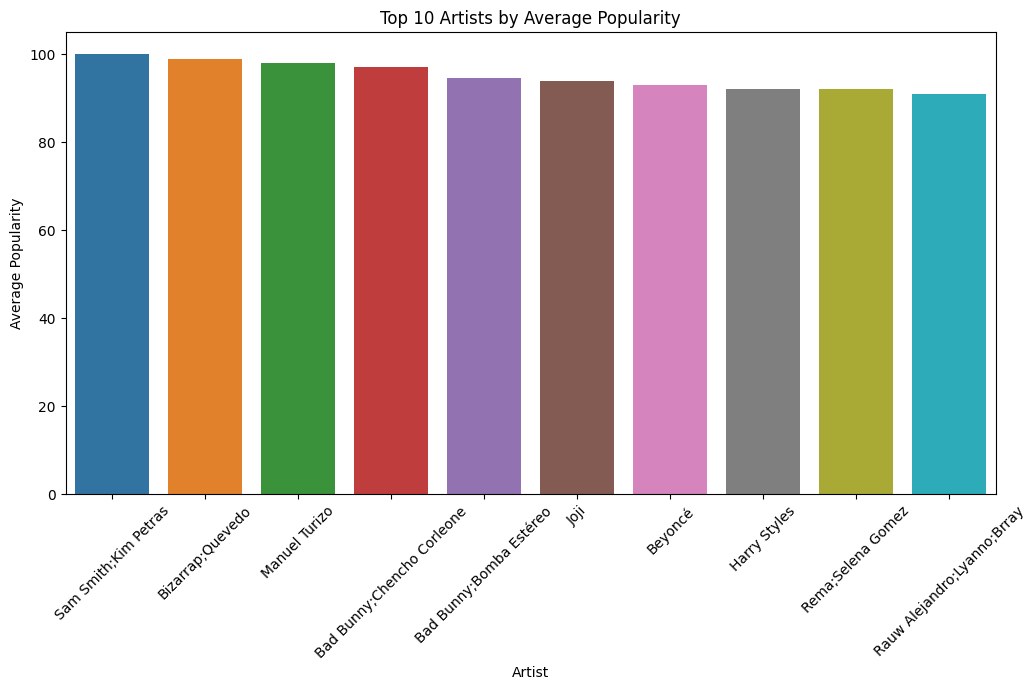

In [56]:
artist_popularity = df.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=artist_popularity.index, y=artist_popularity.values)
plt.xticks(rotation=45)
plt.title('Top 10 Artists by Average Popularity')
plt.xlabel('Artist')
plt.ylabel('Average Popularity')
plt.show()


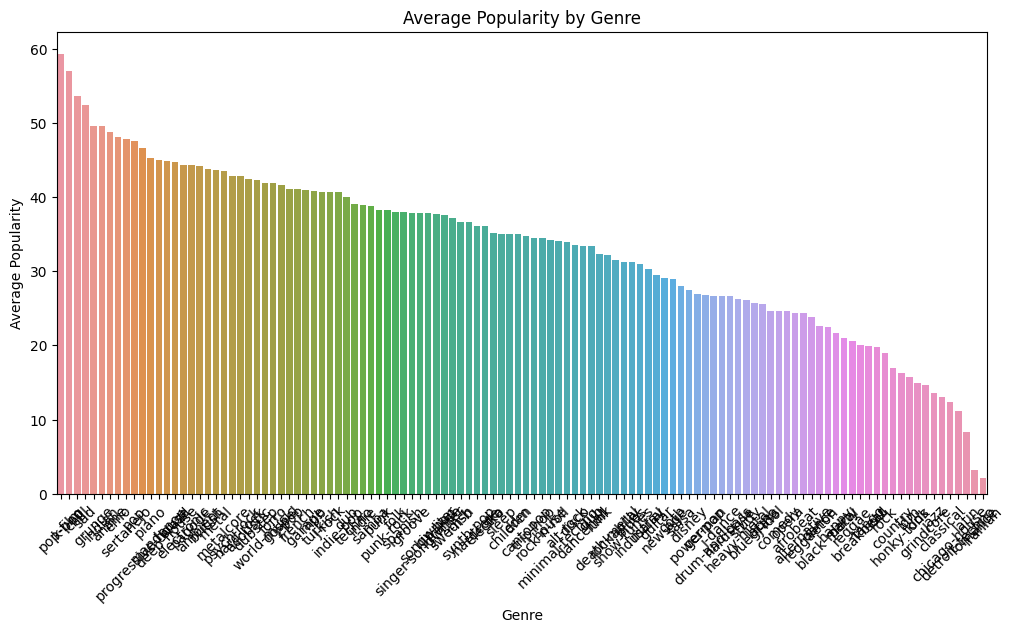

In [57]:
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=genre_popularity.index, y=genre_popularity.values)
plt.xticks(rotation=45)
plt.title('Average Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.show()


In [58]:
df.to_csv("Preprocessed_Data.csv", index=False)